In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [14]:
# 1. Đọc dữ liệu từ file CSV
#df = pd.read_csv("D:\\Python\\Project2_phishing\\PhiUSIIL_Phishing_URL_Dataset.csv")
df = pd.read_csv("D:\\Python\\Project2_phishing\\Dataset.csv")

In [3]:
# Lấy danh sách các feature và nhãn
#y = df['label']
"""X = df[['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
        'TLDLegitimateProb', 'URLCharProb', 'NoOfLettersInURL', 'LetterRatioInURL', 
        'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 
        'LargestLineLength', 'HasFavicon', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 
        'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSubmitButton', 
        'HasSocialNet', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
        'NoOfEmptyRef', 'NoOfExternalRef']]"""
features = df.columns[3:-1].tolist()
X = df[features]
y = df['Type']

In [15]:
# 2. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [16]:
print(y_valid.value_counts(normalize=True))

Type
0    0.51589
1    0.48411
Name: proportion, dtype: float64


In [6]:
"""
min-pick: n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10
mid-pick: n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50
max-pick: n_estimators=1000, max_depth=50, min_samples_split=10 , min_samples_leaf=5, max_leaf_nodes=100

"""

'\nmin-pick: n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10\nmid-pick: n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50\nmax-pick: n_estimators=1000, max_depth=50, min_samples_split=10 , min_samples_leaf=5, max_leaf_nodes=100\n\n'

In [7]:
n_estimators_values = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

In [8]:
# Danh sách lưu kết quả
results_min_pick_estimators = []
for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=n_estimator, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_min_pick_estimators.append((n_estimator, acc))

KeyboardInterrupt: 

In [10]:
results_min_pick_estimators

[(100, 0.8090139140955838),
 (150, 0.8108287961282516),
 (200, 0.8119378907037709),
 (250, 0.8092357330106876),
 (300, 0.8110506150433555),
 (350, 0.8116959064327486),
 (400, 0.8112522686025408),
 (450, 0.811373260738052),
 (500, 0.8112724339584594),
 (550, 0.8118168985682598),
 (600, 0.811635410364993),
 (650, 0.8118975599919338),
 (700, 0.8115547489413188),
 (750, 0.8120387174833635),
 (800, 0.8111716071788667),
 (850, 0.8111917725347852),
 (900, 0.8118975599919338),
 (950, 0.8112724339584594),
 (1000, 0.8117564025005042)]

In [ ]:
# Danh sách lưu kết quả
results_mid_pick_estimators = []
for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=n_estimator, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_mid_pick_estimators.append((n_estimator, acc))

In [12]:
results_mid_pick_estimators

[(100, 0.8515023190159307),
 (150, 0.8518249647106272),
 (200, 0.8525307521677757),
 (250, 0.8528937285743093),
 (300, 0.8525912482355313),
 (350, 0.8528735632183908),
 (400, 0.8526114135914499),
 (450, 0.8524299253881831),
 (500, 0.8522887678967533),
 (550, 0.8524904214559387),
 (600, 0.8525509175236943),
 (650, 0.8525509175236943),
 (700, 0.8528937285743093),
 (750, 0.8527727364387981),
 (800, 0.8530348860657391),
 (850, 0.8529542246420649),
 (900, 0.8528937285743093),
 (950, 0.852994555353902),
 (1000, 0.8529542246420649)]

In [ ]:
# Danh sách lưu kết quả
results_max_pick_estimators = []
for n_estimator in n_estimators_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=n_estimator, max_depth=50, min_samples_split=10 , min_samples_leaf=5, max_leaf_nodes=100, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_max_pick_estimators.append((n_estimator, acc))

In [14]:
results_max_pick_estimators

[(100, 0.8616858237547893),
 (150, 0.8624521072796935),
 (200, 0.8623916112119379),
 (250, 0.8625932647711232),
 (300, 0.8624924379915305),
 (350, 0.862169792296834),
 (400, 0.8624117765678564),
 (450, 0.8622907844323452),
 (500, 0.8622907844323452),
 (550, 0.8626134301270417),
 (600, 0.8623714458560193),
 (650, 0.8625327687033676),
 (700, 0.8625932647711232),
 (750, 0.8628352490421456),
 (800, 0.8628554143980641),
 (850, 0.8629965718894939),
 (900, 0.863077233313168),
 (950, 0.8631175640250051),
 (1000, 0.8631175640250051)]

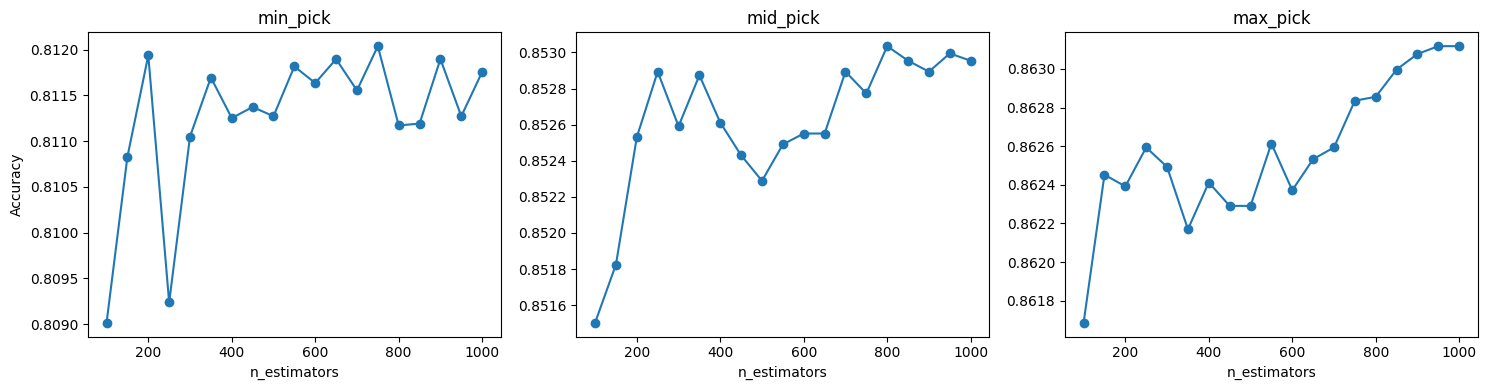

In [15]:
x1, y1 = zip(*results_min_pick_estimators)
x2, y2 = zip(*results_mid_pick_estimators)
x3, y3 = zip(*results_max_pick_estimators)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("n_estimators")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("n_estimators")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("n_estimators")

plt.tight_layout()
plt.show()

In [ ]:
"""
Nhận xét: n_estimators không thực sự ảnh hưởng 
"""

In [ ]:
"""
min-pick: n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10
mid-pick: n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50
max-pick: n_estimators=1000, max_depth=50, min_samples_split=10 , min_samples_leaf=5, max_leaf_nodes=100

"""

In [10]:
max_depth_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [17]:
# Danh sách lưu kết quả
results_min_pick_depth = []
for depth in max_depth_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=depth, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_min_pick_depth.append((depth, acc))

In [18]:
results_min_pick_depth

[(5, 0.8090139140955838),
 (10, 0.8144182294817504),
 (15, 0.8144182294817504),
 (20, 0.8144182294817504),
 (25, 0.8144182294817504),
 (30, 0.8144182294817504),
 (35, 0.8144182294817504),
 (40, 0.8144182294817504),
 (45, 0.8144182294817504),
 (50, 0.8144182294817504)]

In [19]:
# Danh sách lưu kết quả
results_mid_pick_depth = []
for depth in max_depth_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=depth, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_mid_pick_depth.append((depth, acc))

In [20]:
results_mid_pick_depth

[(5, 0.8183101431740271),
 (10, 0.8517846339987901),
 (15, 0.8523492639645089),
 (20, 0.8522887678967533),
 (25, 0.8522887678967533),
 (30, 0.8522887678967533),
 (35, 0.8522887678967533),
 (40, 0.8522887678967533),
 (45, 0.8522887678967533),
 (50, 0.8522887678967533)]

In [11]:
# Danh sách lưu kết quả
results_max_pick_depth = []
for depth in max_depth_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=1000, max_depth=depth, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=100, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_max_pick_depth.append((depth, acc))

KeyboardInterrupt: 

In [26]:
results_max_pick_depth

[(5, 0.8162331115144182),
 (10, 0.8583988707400686),
 (15, 0.8616454930429522),
 (20, 0.862472272635612),
 (25, 0.8624319419237749),
 (30, 0.8623916112119379),
 (35, 0.8623916112119379),
 (40, 0.8623916112119379),
 (45, 0.8623916112119379),
 (50, 0.8623916112119379)]

In [12]:
x1, y1 = zip(*results_min_pick_depth)
x2, y2 = zip(*results_mid_pick_depth)
x3, y3 = zip(*results_max_pick_depth)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("max_depth")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("max_depth")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("max_depth")

plt.tight_layout()
plt.show()

NameError: name 'results_min_pick_depth' is not defined

In [ ]:
"""
min-pick: n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10
mid-pick: n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50
max-pick: n_estimators=1000, max_depth=50, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=100

"""

In [6]:
min_sample_split_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# Danh sách lưu kết quả
results_min_pick_split = []
for sample_split in min_sample_split_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=sample_split, min_samples_leaf=1, max_leaf_nodes=10, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_min_pick_split.append((sample_split, acc))

In [9]:
results_min_pick_split

[(2, 0.8074208509780197),
 (3, 0.8074208509780197),
 (4, 0.8074208509780197),
 (5, 0.8074208509780197),
 (6, 0.8074208509780197),
 (7, 0.8074208509780197),
 (8, 0.8074208509780197),
 (9, 0.8074208509780197),
 (10, 0.8074208509780197)]

In [ ]:
# Danh sách lưu kết quả
results_mid_pick_split = []
for sample_split in min_sample_split_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=25, min_samples_split=sample_split, min_samples_leaf=3, max_leaf_nodes=50, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_mid_pick_split.append((sample_split, acc))

In [32]:
results_mid_pick_split

[(2, 0.8504133897963299),
 (3, 0.8504133897963299),
 (4, 0.8504133897963299),
 (5, 0.8504133897963299),
 (6, 0.8504133897963299),
 (7, 0.8504133897963299),
 (8, 0.8504133897963299),
 (9, 0.8504133897963299),
 (10, 0.8504133897963299)]

In [ ]:
# Danh sách lưu kết quả
results_max_pick_split = []
for sample_split in min_sample_split_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=1000, max_depth=50, min_samples_split=sample_split, min_samples_leaf=5, max_leaf_nodes=100, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_max_pick_split.append((sample_split, acc))

In [34]:
results_max_pick_split

[(2, 0.8623916112119379),
 (3, 0.8623916112119379),
 (4, 0.8623916112119379),
 (5, 0.8623916112119379),
 (6, 0.8623916112119379),
 (7, 0.8623916112119379),
 (8, 0.8623916112119379),
 (9, 0.8623916112119379),
 (10, 0.8623916112119379)]

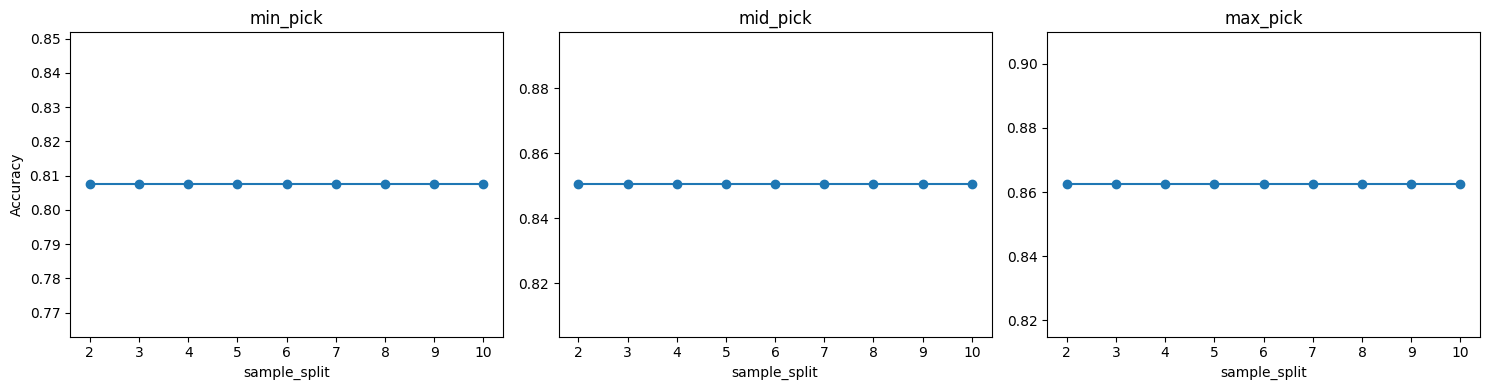

In [35]:
x1, y1 = zip(*results_min_pick_split)
x2, y2 = zip(*results_mid_pick_split)
x3, y3 = zip(*results_max_pick_split)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("sample_split")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("sample_split")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("sample_split")

plt.tight_layout()
plt.show()

In [ ]:
"""
min-pick: n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10
mid-pick: n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50
max-pick: n_estimators=1000, max_depth=50, min_samples_split=10 , min_samples_leaf=5, max_leaf_nodes=100

"""

In [105]:
min_sample_leaf_values = [1, 2, 3, 4, 5]

In [ ]:
# Danh sách lưu kết quả
results_min_pick_leaf = []
for sample_leaf in min_sample_leaf_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=sample_leaf, max_leaf_nodes=10, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_min_pick_leaf.append((sample_leaf, acc))

In [ ]:
results_min_pick_leaf

In [ ]:
# Danh sách lưu kết quả
results_mid_pick_leaf = []
for sample_leaf in min_sample_leaf_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=sample_leaf, max_leaf_nodes=50, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_mid_pick_leaf.append((sample_leaf, acc))

In [ ]:
results_mid_pick_leaf

In [ ]:
# Danh sách lưu kết quả
results_max_pick_leaf = []
for sample_leaf in min_sample_leaf_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=1000, max_depth=50, min_samples_split=10 , min_samples_leaf=sample_leaf, max_leaf_nodes=100, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_max_pick_leaf.append((sample_leaf, acc))

In [ ]:
results_max_pick_leaf

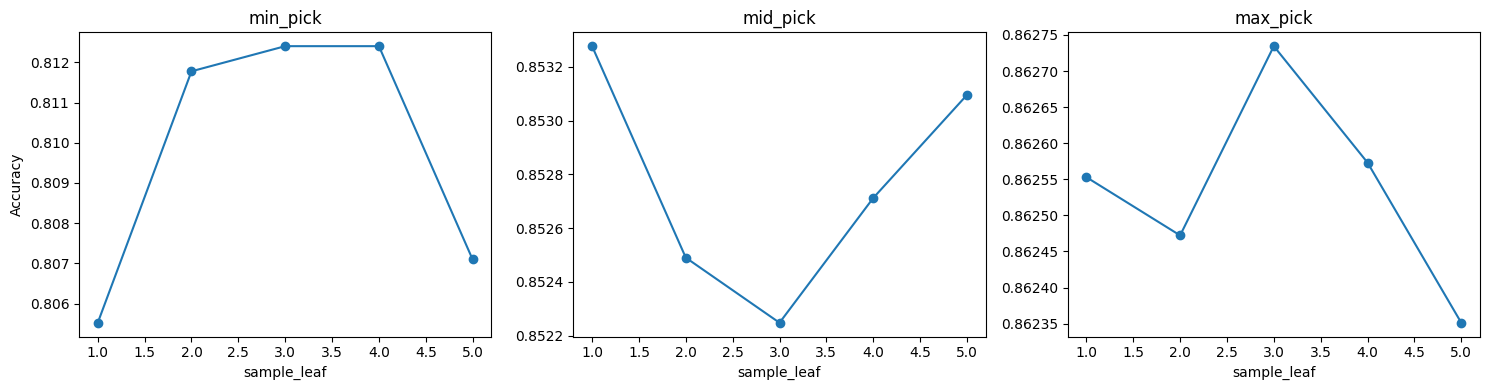

In [121]:
x1, y1 = zip(*results_min_pick_leaf)
x2, y2 = zip(*results_mid_pick_leaf)
x3, y3 = zip(*results_max_pick_leaf)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("sample_leaf")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("sample_leaf")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("sample_leaf")

plt.tight_layout()
plt.show()

In [ ]:
"""
min-pick: n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10
mid-pick: n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=50
max-pick: n_estimators=1000, max_depth=50, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=100

"""

In [ ]:
max_leaf_nodes_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
# Danh sách lưu kết quả
results_min_pick_node = []
for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=leaf_nodes, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_min_pick_node.append((leaf_nodes, acc))

In [ ]:
results_min_pick_node

In [ ]:
# Danh sách lưu kết quả
results_mid_pick_node = []
for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=25, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=leaf_nodes, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_mid_pick_node.append((leaf_nodes, acc))

In [ ]:
results_mid_pick_node

In [ ]:
# Danh sách lưu kết quả
results_max_pick_node = []
for leaf_nodes in max_leaf_nodes_values:
    # Khởi tạo mô hình với max_depth hiện tại
    rf_model = RandomForestClassifier(n_estimators=1000, max_depth=50, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=leaf_nodes, random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_preds = rf_model.predict(X_valid)
    acc = accuracy_score(y_valid, y_preds)
    
    # In và lưu lại
    #print(f"max_depth = {depth}, accuracy = {acc:.4f}")
    results_max_pick_node.append((leaf_nodes, acc))

In [ ]:
results_max_pick_node

In [ ]:
x1, y1 = zip(*results_min_pick_node)
x2, y2 = zip(*results_mid_pick_node)
x3, y3 = zip(*results_max_pick_node)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(x1, y1, marker='o')
axs[0].set_title("min_pick")
axs[0].set_xlabel("leaf_nodes")
axs[0].set_ylabel("Accuracy")

axs[1].plot(x2, y2, marker='o')
axs[1].set_title("mid_pick")
axs[1].set_xlabel("leaf_nodes")

axs[2].plot(x3, y3, marker='o')
axs[2].set_title("max_pick")
axs[2].set_xlabel("leaf_nodes")

plt.tight_layout()
plt.show()

In [20]:
# 10. Hiển thị kết quả
print(pd.DataFrame({'y': y_valid, 'y_preds': y_preds}))

        y  y_preds
242767  1        1
79237   0        0
197477  0        0
144729  1        1
143613  1        1
...    ..      ...
172407  0        0
106114  1        1
98805   0        0
38175   0        1
178870  0        0

[49590 rows x 2 columns]


In [21]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_preds))


Confusion Matrix:
[[21439  4144]
 [ 5112 18895]]


In [22]:
print("\nClassification Report:")
print(classification_report(y_valid, y_preds))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     25583
           1       0.82      0.79      0.80     24007

    accuracy                           0.81     49590
   macro avg       0.81      0.81      0.81     49590
weighted avg       0.81      0.81      0.81     49590



In [5]:
xg_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.03, max_depth=5, reg_lambda=2.0, reg_alpha=2.0)

In [11]:
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [7]:
y_preds = xg_model.predict(X_valid)

In [8]:
# 10. Hiển thị kết quả
print(pd.DataFrame({'y': y_valid, 'y_preds': y_preds}))

        y  y_preds
242767  1        1
79237   0        0
197477  0        0
144729  1        1
143613  1        1
...    ..      ...
172407  0        0
106114  1        1
98805   0        0
38175   0        1
178870  0        0

[49590 rows x 2 columns]


In [9]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_preds))


Confusion Matrix:
[[22870  2713]
 [ 4336 19671]]


In [10]:
print("\nClassification Report:")
print(classification_report(y_valid, y_preds))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     25583
           1       0.88      0.82      0.85     24007

    accuracy                           0.86     49590
   macro avg       0.86      0.86      0.86     49590
weighted avg       0.86      0.86      0.86     49590

